## Link Prediction

Link prediction is the problem of predicting the existence of a link between two nodes in a network.

<center><img src="images/link_prediction_problem.png" width="300"></center>

It has many applications such as: 
- **friend recommendation in social networks:** The goal is to predict which pairs of users, who are not currently friends, are most likely to become friends based on the existing structure of the network and possibly other user-specific data.
- **co-authorship prediction in citation networks:** Link prediction in co-authorship prediction within citation networks refers to the process of forecasting potential future collaborations between authors based on the existing structure and patterns of the network. In this context, a citation network is a graph where nodes represent authors (or papers), and edges represent co-authorship or citation relationships between them.
- **movie recommendation in Netflix:** Link prediction in the context of movie recommendation on platforms like Netflix involves predicting the likelihood of a user forming a "link" (i.e., an interaction such as watching, rating, or liking) with a movie they have not yet interacted with. The goal is to recommend movies that the user is most likely to enjoy based on their past behavior and the behavior of other users with similar preferences.
- **protein interaction prediction in biological networks:** Protein interaction prediction in biological networks, using link prediction, involves forecasting potential interactions between proteins within a biological network. This is crucial for understanding the molecular mechanisms underlying various biological processes and for identifying new targets for drug discovery.
- **drug response prediction:** Link prediction in drug response prediction involves forecasting how different drugs will interact with various targets (such as proteins, genes, or cells) and how these interactions will result in a therapeutic response or adverse effect. The primary goal is to predict the effectiveness or toxicity of a drug on a specific biological target, which can help in personalized medicine, drug discovery, and understanding disease mechanisms.

### Traditional Link Prediction Methods

These methods can be categorized into three classes: 
- heuristic methods 
- latent-feature methods
- content-based methods

The link prediction problem has been studied extensively, leading to the development of numerous techniques. 

___

We will first explore popular heuristics that utilize local and global neighborhood information. Can you think of a simple rule of thumb to predict whether two nodes should be connected?

        
- Common neighbors (CN): It is based on intuition that "the more neighbors you have in common, the more likely you are to be connected". This heuristic simply counts the number of neighbors two nodes ($x$ and $y$) have in common:

\begin{equation*}
f_{CN}(x,y) = |\mathcal{N}(x) \cap \mathcal{N}(y)|
\end{equation*}

- Jaccard coefficient: measures the proportion of shared neighbors between two nodes. It builds on the idea of common neighbors but normalizes the count by the total number of neighbors. This method favors nodes with fewer neighbors over those with a high degree.

\begin{equation*}
f_{Jaccard}(x,y) = \frac{|\mathcal{N}(x) \cap \mathcal{N}(y)|}{|\mathcal{N}(x) \cup \mathcal{N}(y)|}
\end{equation*}

- Preferential attachment (PA): measures link likelihood using the product of node degrees. PA assumes that node x is more likely to connect to node y if y has a high degree. For instance, in citation networks, a new paper is more likely to cite papers that already have many citations.

- Adamic-Adar (AA): evaluates the strength of the link likelihood by considering the weight of common neighbors between two nodes. Specifically, each common neighbor $z$ contributes to the score, but its influence is reduced based on its degree, with the contribution being inversely proportional to the logarithm of its degree $ \frac{1}{\log|G(z)|} $. This approach down-weights high-degree common neighbors, under the assumption that common neighbors with many connections are less indicative of a potential link between the nodes in question.

Note: The Adamic-Adar (AA) heuristic is considered a second-order heuristic because it evaluates the likelihood of a link between two nodes by considering not just the direct properties of the nodes themselves but also the properties of their shared neighbors (i.e., second-order neighbors).

Three heuristics of CN, PA, and AA are illustrated in the following figure:
<center><img src="images/link_prediction_heuristic.png" width="600"></center>
<center><small>image from https://graph-neural-networks.github.io/static/file/chapter10.pdf</small></center>

---

"One of the most popular latent feature methods is **matrix factorization**. This approach factorizes the observed adjacency matrix $A$ of the network into the product of a low-rank latent embedding matrix $Z \in \mathbb{R}^{n \times k}$ and its transpose (where $n$ is the number of nodes and $k$ is the dimension of hidden embeddings). Essentially, it approximates the edge between nodes $i$ and $j$ using their $k$-dimensional latent embeddings, $z_i$ and $z_j$: $\hat{A}_{i,j} = z^T_i z_j$.
<center><img src="images/matrix factorization concept.png" width=500></center>
<center><small>image from Labonne, Maxime. "Hands-On Graph Neural Networks Using Python: Practical techniques and architectures for building powerful graph and deep learning apps with PyTorch". Packt Publishing Ltd, 2023.</small></center>

Intuitively, if nodes $i$ and $j$ are similar, the dot product $z_i^T z_j$ should be high, indicating a likely link between them. This dot product can be used to approximate each element (link) in the adjacency matrix.

The method then minimizes the mean squared error between the reconstructed adjacency matrix and the true adjacency matrix over the observed edges to learn these latent embeddings: $L= \sum_{(i,j) \in E} (A_{i,j}-\hat{A}_{i,j})^2$.

---

However, both heuristic methods and latent-feature methods rely solely on the network’s topology and do not incorporate node features when creating embeddings. Content-based methods use specific features associated with nodes to predict links, which is common in recommender systems. For example, in citation networks, the words used in papers can serve as features. In social networks, a user’s profile details, like their age or interests, are used as features. However, content-based methods often perform worse than heuristic and latent-feature methods because they don’t use the connections between nodes in the graph.


## Link prediction with GNN

In contrast to the traditional methods that either focus on graph structure or node features, GNN methods integrate both graph structure features and content features by learning them simultaneously in a unified framework, taking advantage of the powerful graph representation learning capabilities of GNNs.

There are two main paradigms for link prediction using GNNs: node-based and subgraph-based. **Node-based** methods aggregate the node representations learned by a GNN to form the link representation. In contrast, **subgraph-based** methods extract a local subgraph surrounding each potential link and use the representation of this subgraph, learned by a GNN, as the link representation.

### Node based GNN


The foundational node-based method for link prediction is the Graph AutoEncoder (GAE), introduced by Kipf and Welling in 2016. GAE is designed to learn low-dimensional node embeddings from graph data, which can then be used to predict the existence of links between nodes. Given a graph's adjacency matrix $A$ and node feature matrix $X$, GAE employs a Graph Convolutional Network (GCN) to compute a node representation $z_i$ for each node $i$:

\begin{equation*}
\hat{A}_{ij} = \sigma(z_i^T z_j), where \ z_i = Z[i,:], Z = GCN(X,A)
\end{equation*}

The prediction of a link between nodes $i$ and $j$ is based on the similarity score $s(z_i^T z_j)$, where the dot product between their embeddings $z_i$ and $z_j$ is used to estimate the likelihood of an edge between them. The specific prediction for the link is given by:

\begin{equation*}
\hat{A}_{ij} = \sigma(z_i^T z_j)
\end{equation*}

where:
- $Z$ is the matrix of node representations output by the GCN, with the $i$-th row $z_i = Z[i,:]$ representing the embedding for node $i$.
- $\hat{A}_{ij}$ is the predicted probability of a link between nodes $i$ and $j$.
- $\sigma$ is the sigmoid function, which ensures that the predicted probabilities lie between 0 and 1.

If no node feature matrix $X$ is provided, GAE can use a one-hot encoded identity matrix $I$ as input instead, treating each node's identity as its feature.

The GAE model is trained to minimize the cross-entropy loss between the reconstructed adjacency matrix $\hat{A}$ and the true adjacency matrix $A$. The loss function is defined as:

\begin{equation*}
L = \sum_{i \in V, j \in V} \left[ -A_{ij} \log \hat{A}_{ij} - (1 - A_{ij}) \log (1 - \hat{A}_{ij}) \right]
\end{equation*}

This loss function encourages the model to accurately reconstruct the adjacency matrix, effectively learning node embeddings that capture the underlying graph structure and are useful for predicting missing links.

<center><img src="images/GAE.png" width=700></center>
<center><small>image from https://arxiv.org/pdf/1901.00596</small></center>

In practice, the loss for positive edges (where $A_{i,j} = 1$) is increased by a factor of $k$, which is the ratio of negative edges (where $A_{i,j} = 0$) to positive edges. This adjustment helps balance the impact of positive and negative edges on the overall loss. Without this, the loss could be overwhelmed by negative edges because real-world networks are often sparse, meaning there are many more negative edges than positive ones.

##### Does GAE just relearn the actual $A$?
It might seem like GAE (Graph AutoEncoder) is just trying to reconstruct the actual adjacency matrix $A$, but its real power lies in how it learns to generalize from the data.
While GAE does try to reconstruct the adjacency matrix $A$, it's not just memorizing it. Instead, it's learning patterns and structures within the graph. By compressing the graph structure into a lower-dimensional space, the model can generalize to predict links that are not directly observed in the training data.

Hence, While GAE does aim to reconstruct the adjacency matrix $A$ during training, it's doing so by learning a compressed, latent representation of the graph. The model tries to capture the underlying structure and patterns, not just memorize the existing connections. This learned representation can then be used to make predictions about new, unseen links that weren’t present in the original matrix. In essence, GAE generalizes from the observed data to infer the likelihood of connections between any pair of nodes, whether or not those connections were in the original graph.

### Subgraph-based GNN

Subgraph-based methods extract a local subgraph around each target link and learn a subgraph representation through a GNN for link prediction. 

The pioneering work of subgraph-based methods is SEAL (Subgraph-based Embedding Attributed Learning). SEAL first extracts an enclosing subgraph for each target link to predict, and then applies a graph-level GNN (with pooling) to classify whether the subgraph corresponds to link existence. 

The method defines the subgraph formed by the target nodes $(i, j)$ and their $k$-hop neighbors as the **enclosing subgraph**. This subgraph is used as the input for predicting the likelihood of a link between the two target nodes, rather than using the entire graph. Essentially, SEAL automatically <u>**learns** a local heuristic for link prediction</u> by focusing on the relevant local structure around the potential link.

The SEAL framework involves three key steps:

1. **Enclosing Subgraph Extraction**: 
   - In this step, the algorithm identifies and extracts the subgraph that includes the target nodes and their $k$-hop neighbors. This subgraph captures the local structure around the target link. 
   The three different hops of a sample target node are illustrated in the following figure:
   <center><img src="images/hops.png" width="400"></center>

   - The training data consists of both real links (positive samples) and fake links (negative samples generated through negative sampling). By focusing on the enclosing subgraph, the model narrows its attention to the most relevant local information for predicting whether a link should exist.

2. **Node Label Construction**:
   - SEAL introduces an additional feature for each node within the subgraph through a technique called **Double Radius Node Labeling (DRNL)**. This assigns an integer label to each node based on its role and position relative to the target nodes.
   - The purpose of this labeling is to differentiate nodes based on their structural roles in the subgraph. For instance, the target nodes $i$ and $j$ are at the center of the subgraph and have a direct influence on the prediction, so they receive distinct labels. Nodes at different hop distances from $i$ and $j$ may also have varying importance in determining whether the link exists, so they are labeled accordingly.
   - Proper node labeling is crucial for the success of subgraph-based link prediction methods. By distinguishing nodes based on their roles, SEAL enhances its ability to learn effective link representations, making subgraph-based methods more powerful than node-based methods for link prediction.

   > **NOTE** \
   > DRNL (Double Radius Node Labeling) works like this:

      1. First, assign the label "1" to the two target nodes, $x$ and $y$.
      2. For any other node $i$ in the sugraph, its label is determined by how far it is from both $x$ and $y$. If the distance from $i$ to both $x$ and $y$ is 1, it gets label "2". If the distances are (1, 2) or (2, 1), it gets label "3", and so on.
      3. The further a node is from the two center nodes $x$ and $y$, the higher its label.

         There’s a formula to directly calculate the label for a node based on its distances to $x$ and $y$:

         \begin{equation*}
         l(i) = 1 + \text{min}(dx, dy) + \left(\frac{d}{2}\right)\left(\left(\frac{d}{2}\right) + (d \% 2) - 1\right)
         \end{equation*}

         Here, $dx$ and $dy$ are the distances from $i$ to $x$ and $y$, and $d$ is the sum of these distances. The formula uses basic arithmetic to assign labels systematically.

         For nodes that are too far away to have a meaningful distance to $x$ or $y$, they get a null label "0". After assigning DRNL labels, SEAL converts them into one-hot encoding vectors or feeds them into an embedding layer to generate their embeddings for use in the model.
         
         DRNL is illustrated in the following example:
         <center><img src="images/seal_node_labeling.png" width="400"></center>
         <center><small>image from https://graph-neural-networks.github.io/static/file/chapter10.pdf</small></center>
 



3. **GNN Training**:
   - In the final step, the node information matrices (which now include both the original features and the node labels) are fed into a Graph Neural Network (GNN). The GNN processes this information to output link likelihoods, essentially predicting how likely it is that a link exists between the target nodes.
   - By training the GNN on these subgraphs with labeled nodes, SEAL learns to identify patterns and structures that are indicative of link presence, allowing it to make accurate link predictions based on local subgraph information.



The steps in SEAL are illustrated in the following figure:

<center><img src="images/SEAL_overall.png" width="800"></center>
<center><small>image from Labonne, Maxime. "Hands-On Graph Neural Networks Using Python: Practical techniques and architectures for building powerful graph and deep learning apps with PyTorch". Packt Publishing Ltd, 2023.</small></center>

### Example: A basic implementation of SEAL algorithm for link prediction in Karate Club dataset.

Epoch 10, Loss: 1.3853
Epoch 20, Loss: 0.9475
Epoch 30, Loss: 0.7131
Epoch 40, Loss: 0.6038
Epoch 50, Loss: 0.5394
Epoch 60, Loss: 0.5007
Epoch 70, Loss: 0.4689
Epoch 80, Loss: 0.4446
Epoch 90, Loss: 0.4245
Epoch 100, Loss: 0.4070
Epoch 110, Loss: 0.3915
Epoch 120, Loss: 0.3785
Epoch 130, Loss: 0.3669
Epoch 140, Loss: 0.3558
Epoch 150, Loss: 0.3453
Epoch 160, Loss: 0.3360
Epoch 170, Loss: 0.3272
Epoch 180, Loss: 0.3190
Epoch 190, Loss: 0.3115
Epoch 200, Loss: 0.3046
Epoch 210, Loss: 0.2981
Epoch 220, Loss: 0.2924
Epoch 230, Loss: 0.2872
Epoch 240, Loss: 0.2824
Epoch 250, Loss: 0.2780
Epoch 260, Loss: 0.2738
Epoch 270, Loss: 0.2699
Epoch 280, Loss: 0.2657
Epoch 290, Loss: 0.2612
Epoch 300, Loss: 0.2564
Positive Edge Accuracy: 0.9718
Negative Edge Accuracy: 0.9507


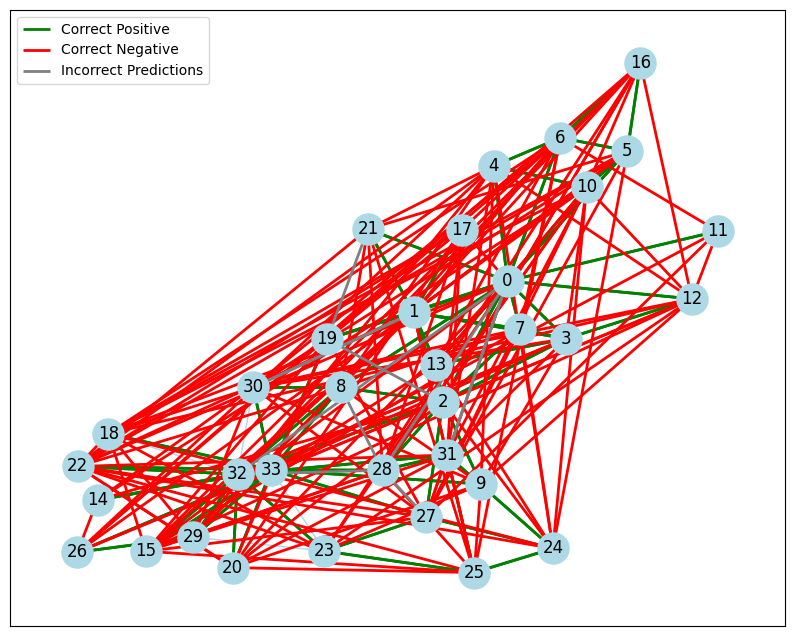

In [5]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import k_hop_subgraph, negative_sampling, to_networkx, train_test_split_edges
import networkx as nx
from torch_geometric.nn import GCNConv, global_add_pool
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric.transforms import RandomLinkSplit

# Load the Karate Club dataset
dataset = KarateClub()
data = dataset[0]

# Function to apply DRNL node labeling
def drnl_node_labeling(subgraph, src, dst):
    G = to_networkx(subgraph, to_undirected=True)
    src_dist = nx.single_source_shortest_path_length(G, src.item())
    dst_dist = nx.single_source_shortest_path_length(G, dst.item())
    labels = torch.zeros(subgraph.num_nodes, dtype=torch.long)
    
    for node in G.nodes:
        d_src = src_dist.get(node, 100)#float('inf'))  # Distance from src
        d_dst = dst_dist.get(node, 100)#float('inf'))  # Distance from dst
        labels[node] = 1 + min(d_src, d_dst) + abs(d_src - d_dst)
    labels[labels >= 3] = 0  # Cap labels to a max value of 2
    return labels

# Function to extract subgraph and apply DRNL
def extract_subgraph_with_drnl(src, dst, edge_index, x, num_hops):
    nodes, sub_edge_index, mapping, edge_mask = k_hop_subgraph([src, dst], num_hops, edge_index, relabel_nodes=True)
    sub_x = x[nodes]
    labels = drnl_node_labeling(Data(edge_index=sub_edge_index, x=sub_x), src=mapping[0], dst=mapping[1])
    return sub_x, sub_edge_index, labels, nodes

# Define the GNN model with DRNL labels as input
class GNNWithLabels(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_node_labels):
        super(GNNWithLabels, self).__init__()
        self.conv1 = GCNConv(in_channels + num_node_labels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index, node_labels, batch):
        # Concatenate node features and node labels
        x = torch.cat([x, node_labels], dim=-1)
        # Apply two GCN layers
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        # Global pooling to aggregate the node embeddings
        x = global_add_pool(x, batch)
        return torch.sigmoid(x)  # Predict link probability for the subgraph

# Train-test split for edges
data2 = data.clone()
transform = RandomLinkSplit(is_undirected=True, num_val=0, num_test=0.1)
train_data, val_data, test_data = transform(data)

# Now you have:
train_pos_edge_index = train_data.edge_index #: Positive edges for training
test_pos_edge_index = test_data.edge_index #: Positive edges for testing
train_neg_edge_index = negative_sampling(
    edge_index=train_data.edge_index,
    num_nodes=train_data.num_nodes,
    num_neg_samples=train_data.edge_index.size(1)
)

test_neg_edge_index = negative_sampling(
    edge_index=test_data.edge_index,
    num_nodes=test_data.num_nodes,
    num_neg_samples=test_data.edge_index.size(1)
)

# Training function
def train(model, data, pos_edge_index, neg_edge_index, num_hops, optimizer, device, num_node_labels):
    model.train()
    optimizer.zero_grad()

    total_loss = 0
    for edge in pos_edge_index.t().tolist() + neg_edge_index.t().tolist():
        src, dst = edge

        # Extract subgraph and apply DRNL labeling
        sub_x, sub_edge_index, labels, nodes = extract_subgraph_with_drnl(
            src, dst, edge_index=pos_edge_index,
            x=data.x, num_hops=num_hops
        )
        
        # One-hot encode labels
        one_hot_labels = F.one_hot(labels, num_classes=num_node_labels).float().to(device)

        # Batch index for pooling (since each subgraph is treated as its own 'batch')
        batch = torch.zeros(sub_x.size(0), dtype=torch.long).to(device)

        # Forward pass
        out = model(sub_x.to(device), sub_edge_index.to(device), one_hot_labels, batch)

        # Compute loss (binary cross-entropy for link prediction)
        target = torch.tensor([1.0 if edge in pos_edge_index.t().tolist() else 0.0]).to(device)
        loss = F.binary_cross_entropy(out[0], target)

        total_loss += loss.item()
        loss.backward()

    optimizer.step()
    return total_loss / len(pos_edge_index[1])

# Testing function
def test(model, data, pos_edge_index, neg_edge_index, num_hops, device, num_node_labels, threshold=0.5):
    model.eval()

    correct_pos, correct_neg = 0, 0
    total_pos, total_neg = len(pos_edge_index[1]), len(neg_edge_index[1])
    predictions = []
    with torch.no_grad():
        for edge in pos_edge_index.t().tolist() + neg_edge_index.t().tolist():
            src, dst = edge

            # Extract subgraph and apply DRNL labeling
            sub_x, sub_edge_index, labels, nodes = extract_subgraph_with_drnl(src, dst, edge_index=pos_edge_index, 
            x=data.x, num_hops=num_hops)
            
            # One-hot encode labels
            one_hot_labels = F.one_hot(labels, num_classes=num_node_labels).float().to(device)

            # Batch index for pooling
            batch = torch.zeros(sub_x.size(0), dtype=torch.long).to(device)

            # Forward pass
            out = model(sub_x.to(device), sub_edge_index.to(device), one_hot_labels, batch)
            prediction = out[0].item()
            predictions.append(prediction)
            if edge in pos_edge_index.t().tolist():
                if prediction >= threshold:
                    correct_pos += 1
            else:
                if prediction < threshold:
                    correct_neg += 1

    pos_acc = correct_pos / total_pos
    neg_acc = correct_neg / total_neg

    print(f'Positive Edge Accuracy: {pos_acc:.4f}')
    print(f'Negative Edge Accuracy: {neg_acc:.4f}')

    return pos_acc, neg_acc, predictions

# Visualization function for analyzing predictions
def visualize_predictions(predictions, pos_edge_index, neg_edge_index, threshold=0.5):
    G = to_networkx(Data(edge_index=data2.edge_index, x=data2.x), to_undirected=True)

    pos_correct_edges = []
    neg_correct_edges = []
    incorrect_edges = []

    for index, edge in enumerate(pos_edge_index.t().tolist() + neg_edge_index.t().tolist()):
        src, dst = edge

        if edge in pos_edge_index.t().tolist():
            if predictions[index] >= threshold:
                pos_correct_edges.append((src, dst))
            else:
                incorrect_edges.append((src, dst))
        else:
            if predictions[index] < threshold:
                neg_correct_edges.append((src, dst))
            else:
                incorrect_edges.append((src, dst))

    # Visualize the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=pos_correct_edges, edge_color='green', width=2, label='Correct Positive')
    nx.draw_networkx_edges(G, pos, edgelist=neg_correct_edges, edge_color='red', width=2, label='Correct Negative')
    nx.draw_networkx_edges(G, pos, edgelist=incorrect_edges, edge_color='gray', width=2, label='Incorrect Predictions')

    nx.draw_networkx_labels(G, pos)
    plt.legend()
    plt.show()

# Initialize model, optimizer, and hyperparameters
num_node_labels = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNWithLabels(in_channels=data.num_node_features, hidden_channels=8, out_channels=1, num_node_labels=num_node_labels).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model on the training edges
for epoch in range(1, 301):
    loss = train(model, data, train_pos_edge_index, train_neg_edge_index, num_hops=2, optimizer=optimizer, device=device, num_node_labels=num_node_labels)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Test the model on unseen edges (test set)
pos_acc, neg_acc, predictions = test(model, data, test_pos_edge_index, test_neg_edge_index, num_hops=2, device=device, num_node_labels=num_node_labels)

# Visualize the prediction results
visualize_predictions(predictions, test_pos_edge_index, test_neg_edge_index)
